In [ ]:
import pandas as pd
dataSepsis = pd.read_csv(r"/content/Dataset.csv", sep=",")

In [ ]:
dataSepsis.head(5)


,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [ ]:
dataSepsis.shape


(283691, 44)

In [ ]:
dataSepsis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283691 entries, 0 to 283690
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        283691 non-null  int64  
 1   Hour              283691 non-null  int64  
 2   HR                261628 non-null  float64
 3   O2Sat             249676 non-null  float64
 4   Temp              96405 non-null   float64
 5   SBP               240009 non-null  float64
 6   MAP               254623 non-null  float64
 7   DBP               147881 non-null  float64
 8   Resp              255721 non-null  float64
 9   EtCO2             0 non-null       float64
 10  BaseExcess        28899 non-null   float64
 11  HCO3              22725 non-null   float64
 12  FiO2              39808 non-null   float64
 13  pH                31999 non-null   float64
 14  PaCO2             24480 non-null   float64
 15  SaO2              13848 non-null   float64
 16  AST               42

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
dataSepsis.isnull().sum()


,0
Unnamed: 0,0
Hour,0
HR,22063
O2Sat,34015
Temp,187286
SBP,43682
MAP,29068
DBP,135810
Resp,27970
EtCO2,283691


In [ ]:
dataSepsis.nunique()


,0
Unnamed: 0,336
Hour,336
HR,300
O2Sat,127
Temp,464
SBP,625
MAP,770
DBP,341
Resp,172
EtCO2,0


In [ ]:
patients = list(dataSepsis['Patient_ID'].unique())
len(patients)

7298

In [ ]:
dataSepsis['Unit'] = dataSepsis['Unit1'].add(dataSepsis['Unit2'], fill_value=0)
dataSepsis.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072,NaN
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072,NaN
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072,NaN
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072,NaN
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072,NaN


<Axes: >

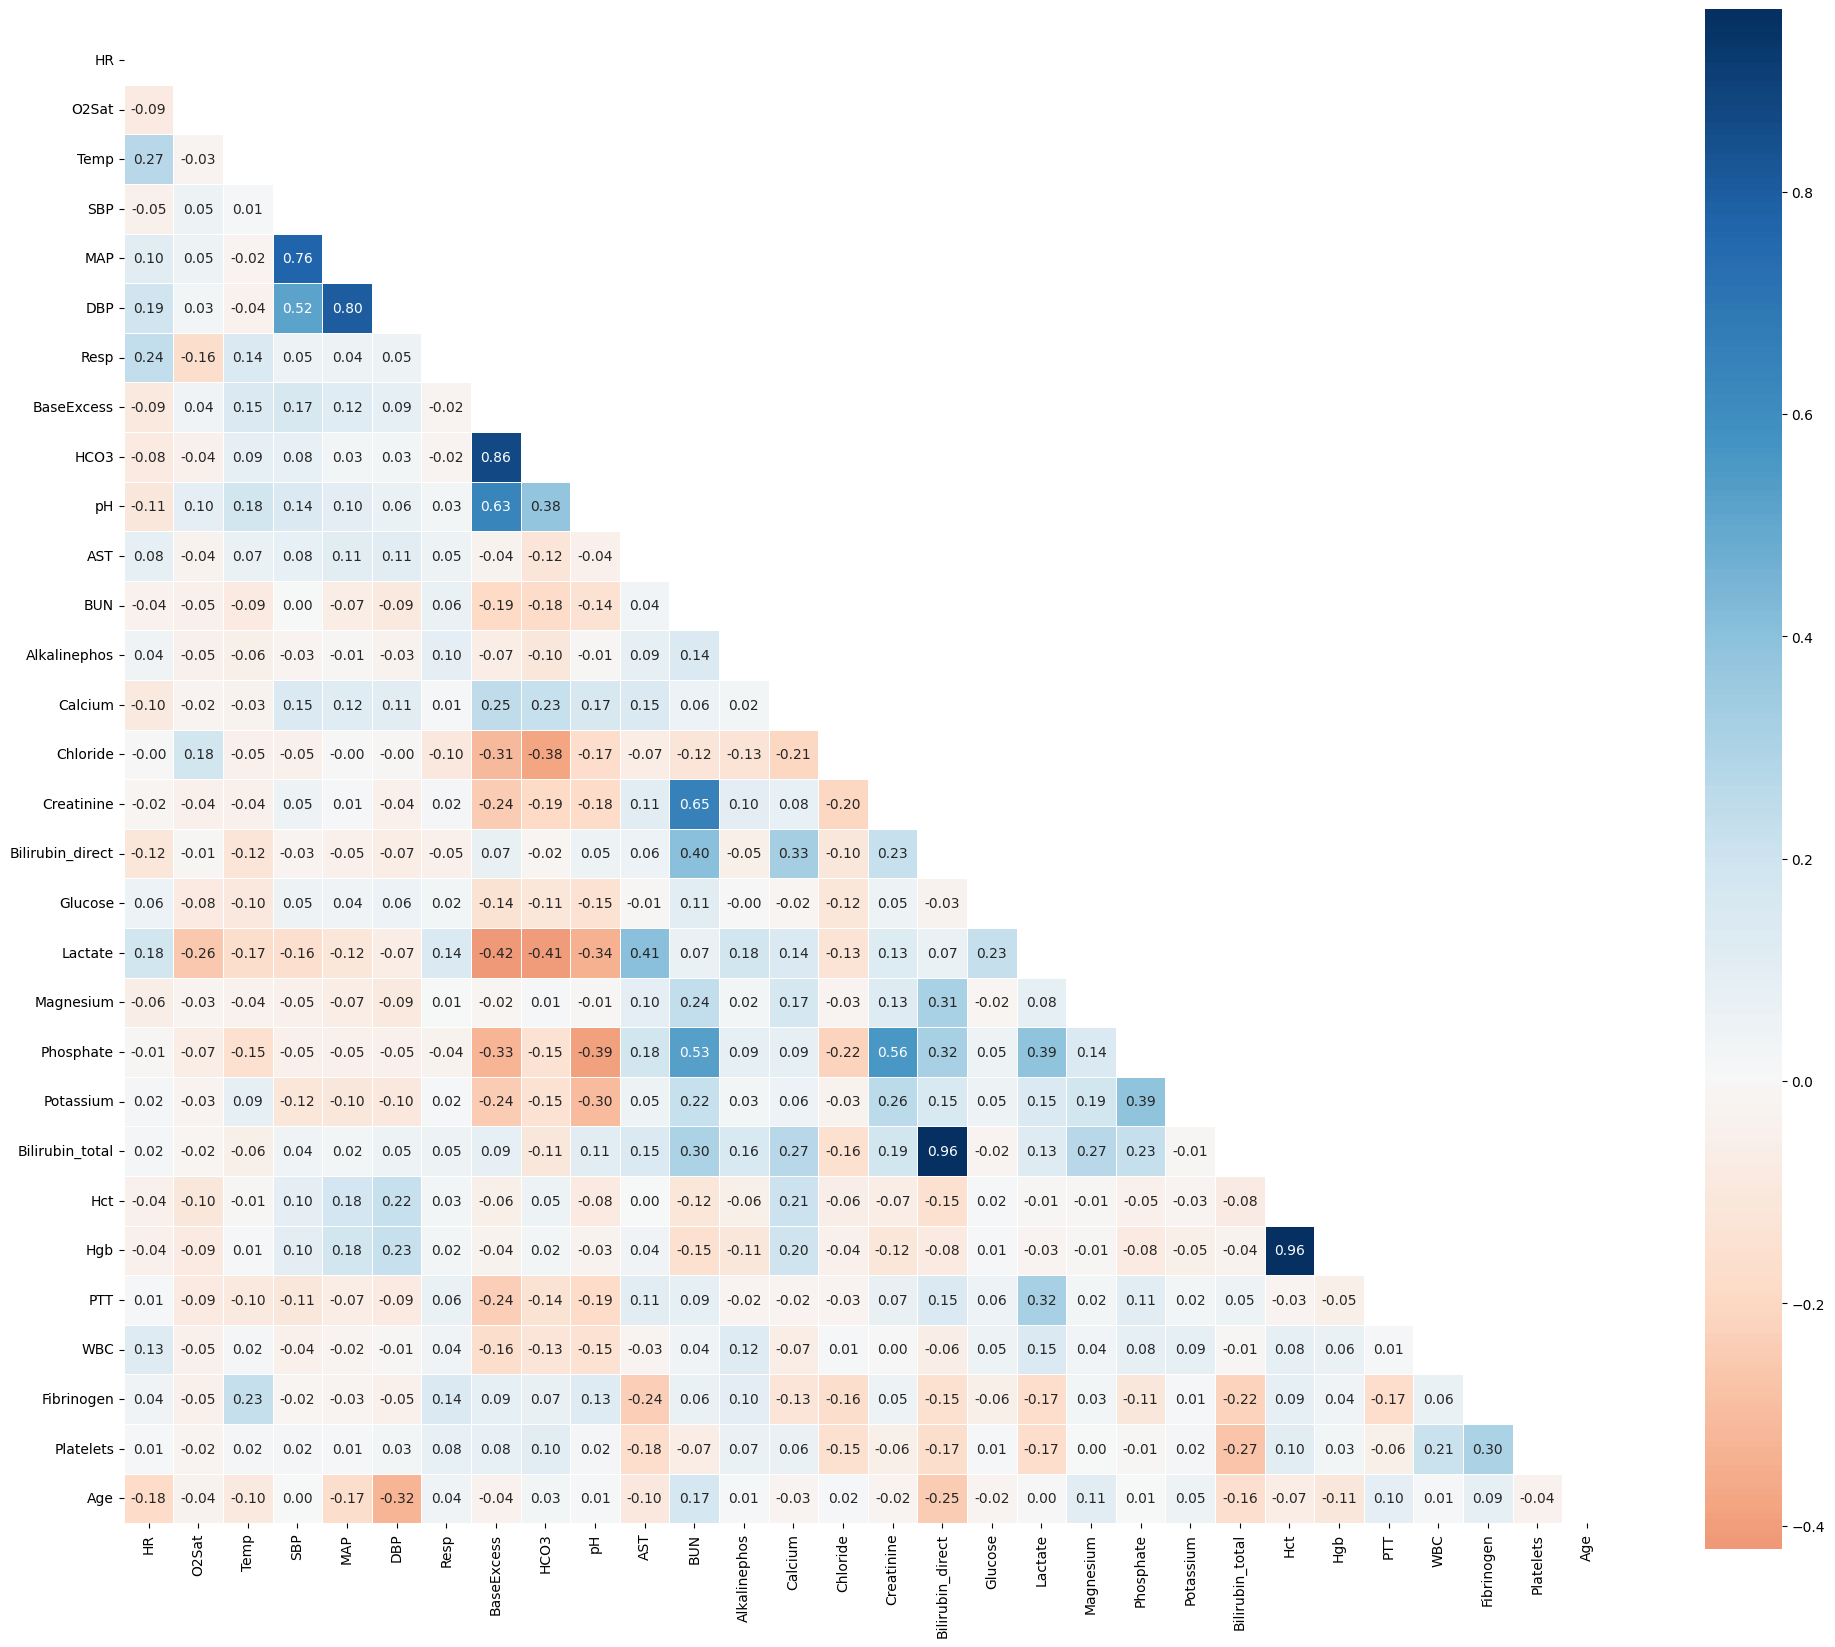

In [ ]:
import seaborn as sns
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = dataSepsis[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,20))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

In [ ]:
columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Bilirubin_direct','Hct','Unit1','Unit2'}

In [ ]:

dataSepsis.fillna(0, inplace=True)

In [ ]:
duplicated = dataSepsis[dataSepsis.duplicated(keep=False)]

In [ ]:
duplicated.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit


In [ ]:
target_dataSepsis = dataSepsis [(dataSepsis['HR'] >= 200) & (dataSepsis['HR'] <= 10 )]

In [ ]:
target_dataSepsis.shape

(0, 45)

In [ ]:
target_dataSepsis = dataSepsis [(dataSepsis['Temp'] >= 40) & (dataSepsis['Temp'] <= 20 )]

In [ ]:
rouped_data = dataSepsis.groupby(['Patient_ID']).agg({'Hour': 'mean',
                                                       'HR': ['mean', 'min', 'max', 'std'],
                                                       'O2Sat': ['mean', 'min', 'max', 'std'],
                                                       'Temp': ['mean', 'min', 'max', 'std'],
                                                       'MAP': ['mean', 'min', 'max', 'std'],
                                                       'Resp': ['mean', 'min', 'max', 'std'],
                                                       'PaCO2': ['mean', 'min', 'max', 'std'],
                                                        'FiO2': ['mean', 'min', 'max', 'std'],
                                                       'SaO2': ['mean', 'min', 'max', 'std'],
                                                       'AST': ['mean', 'min', 'max', 'std'],
                                                        'BUN': ['mean', 'min', 'max', 'std'],
                                                       'Creatinine': ['mean', 'min', 'max', 'std'],
                                                       'Glucose': ['mean', 'min', 'max', 'std'],
                                                       'Hgb': ['mean', 'min', 'max', 'std'],
                                                       'WBC': ['mean', 'min', 'max', 'std'],
                                                       'Platelets': ['mean', 'min', 'max', 'std'],
                                                       'Bilirubin_total': ['mean', 'min', 'max', 'std'],
                                                        'Age': 'mean',
                                                       'Gender': 'first',
                                                       'HospAdmTime': 'first',
                                                       'ICULOS': 'max',
                                                       'SepsisLabel': 'max',
                                                       'Unit': 'first'})